In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [2]:
# Load dataset
car_df = pd.read_csv("car data.csv")
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
# Check non-numeric columns
non_numeric_columns = car_df.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

Index(['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'], dtype='object')


In [4]:
# Drop the 'Car_Name' column
car_df = car_df.drop(columns=['Car_Name'])

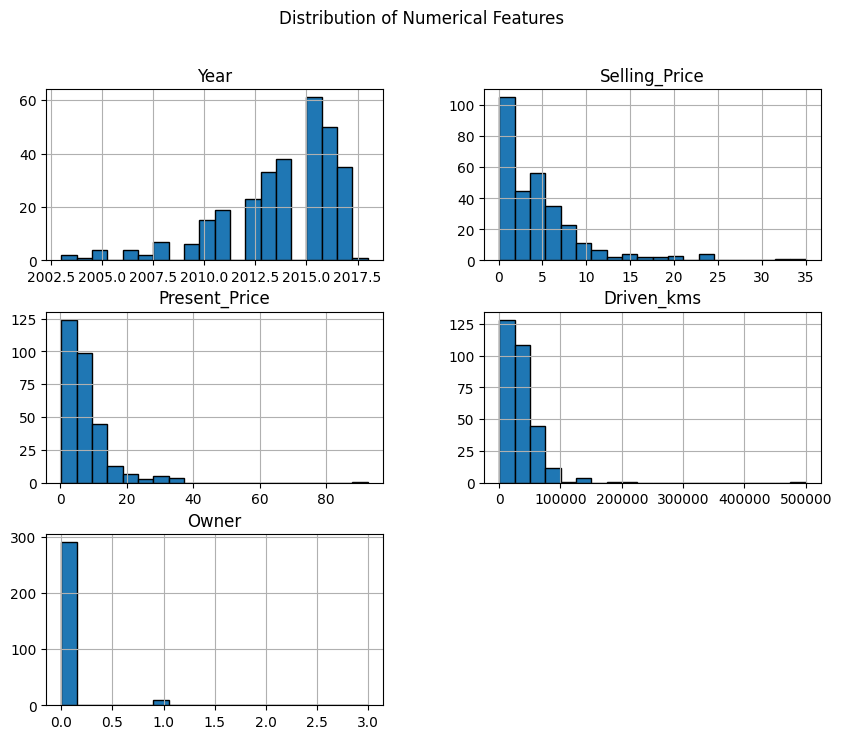

In [5]:
# Visualize the distribution of numerical features
car_df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

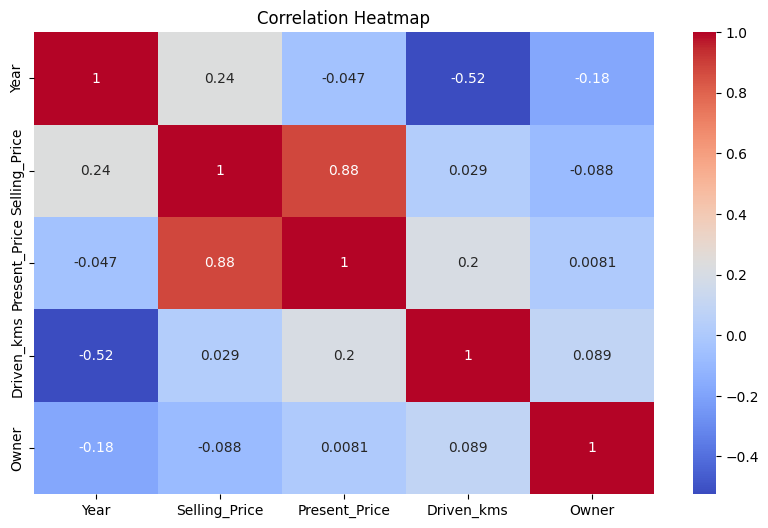

In [7]:
# Correlation heatmap
numeric_df = car_df.select_dtypes(include=[float, int])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Feature engineering (e.g., converting 'Year' to 'Car_Age')
car_df['Car_Age'] = 2024 - car_df['Year']  # Assuming the current year is 2024

In [9]:
# Define the features and the target variable
X = car_df.drop(columns=['Selling_Price'])
y = car_df['Selling_Price']

In [10]:
# Preprocessing pipelines for numerical and categorical data
numerical_features = ['Car_Age', 'Present_Price', 'Driven_kms', 'Owner']
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
lin_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
# Training the Linear Regression model
lin_reg_pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred_lin_reg = lin_reg_pipeline.predict(X_test)

# Evaluating the Linear Regression model
mae_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
rmse_lin_reg = np.sqrt(mse_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)


In [14]:
# Output Linear Regression results
print(f"Linear Regression MAE: {mae_lin_reg}")
print(f"Linear Regression RMSE: {rmse_lin_reg}")
print(f"Linear Regression R2 Score: {r2_lin_reg}")

Linear Regression MAE: 1.2163740193330423
Linear Regression RMSE: 1.865837568094247
Linear Regression R2 Score: 0.8488707839193139


In [15]:
# Creating a pipeline for Random Forest Regressor model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Training the Random Forest Regressor model
rf_pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluating the Random Forest Regressor model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [16]:
# Output Random Forest Regressor results
print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R2 Score: {r2_rf}")

Random Forest MAE: 0.6190557377049181
Random Forest RMSE: 0.931368371066438
Random Forest R2 Score: 0.9623431720667264


In [17]:
# Save the trained Random Forest Regressor model using pickle
model_filename = 'random_forest_car_price_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf_pipeline, file)

print(f"Model saved as {model_filename}")

Model saved as random_forest_car_price_model.pkl
